In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
from sklearn.datasets import load_iris
iris = load_iris()

In [55]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [56]:
iris.data[22]

array([4.6, 3.6, 1. , 0.2])

In [57]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [58]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size=0.8)

### Logistic Regression

In [95]:
import warnings
warnings.simplefilter("ignore", category=UserWarning)

In [96]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

In [97]:
model1.fit(X_train, y_train)

LogisticRegression()

In [98]:
model1.score(X_test, y_test)

1.0

### Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=5)

In [100]:
model2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5)

In [101]:
model2.score(X_test, y_test)

1.0

### K Fold

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [103]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)

In [104]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [105]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(score)
    return score

In [106]:
get_score(SVC(),X_train, X_test, y_train, y_test)

1.0


1.0

In [107]:
lr_score = []
rf_score = []
svm_score = []
for train_index, test_index in kf.split(iris.data):
    X_train, X_test, y_train, y_test = iris.data[train_index], iris.data[test_index],  iris.target[train_index], iris.target[test_index]
    
    lr_score.append(get_score(LogisticRegression(),X_train, X_test, y_train, y_test))
    rf_score.append(get_score(RandomForestClassifier(),X_train, X_test, y_train, y_test))
    svm_score.append(get_score(SVC(),X_train, X_test, y_train, y_test))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [108]:
lr_score

[0.0, 0.0, 0.0]

In [109]:
rf_score

[0.0, 0.0, 0.0]

In [110]:
svm_score

[0.0, 0.0, 0.0]

### cross_val_score

In [111]:
from sklearn.model_selection import cross_val_score

In [112]:
lr_score = cross_val_score(LogisticRegression(), iris.data, iris.target)
lr_score

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [113]:
rf_score = cross_val_score(RandomForestClassifier(), iris.data, iris.target)
rf_score

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

In [114]:
svm_score = cross_val_score(SVC(), iris.data, iris.target)
svm_score

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [115]:
mean_values = [lr_score.mean(), rf_score.mean(), svm_score.mean()]

In [116]:
mean_values

[0.9733333333333334, 0.9600000000000002, 0.9666666666666666]

In [117]:
models = ['Logistic Regression', 'Random Forest', 'Support Vector Mschine']
models

['Logistic Regression', 'Random Forest', 'Support Vector Mschine']

*In this case, **LogisticRegression** performs **better***

<Axes: xlabel='row_0'>

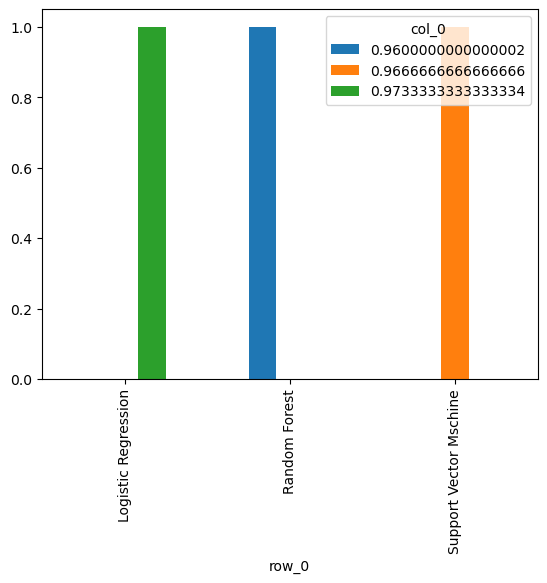

In [118]:
import pandas as pd
pd.crosstab(models,mean_values).plot(kind='bar')